In [346]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sb

# Kaggle Advanced House Prices Dataset 

> Objective: Predict the SalePrice of houses in Ames, Iowa.
    
Dataset: The Ames Housing Dataset: https://www.kaggle.com/datasets/prevek18/ames-housing-dataset
   
Steps: 

   1. Visualize and Describe our training data ✅
   2. Look for valuable features by checking for correlations ✅
   3. Engineer new features that look interesting.✅
   4. Encode our data (change categorical and fill the missing values)✅
   5. Train an enesemble random forest ✅ 
   6. Train an ensemble gradient boose regressor ✅
   7. Evaluate predictions using Root Mean Squared Error ✅
   8. Hypertune our models ✅
   9. Create predictions for the test set. ✅

In [516]:
train = pd.read_csv('~/Desktop/kaggle_housing/data/house-prices-advanced-regression-techniques/train.csv')

## 1. Visualize Our Data

In [348]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [349]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


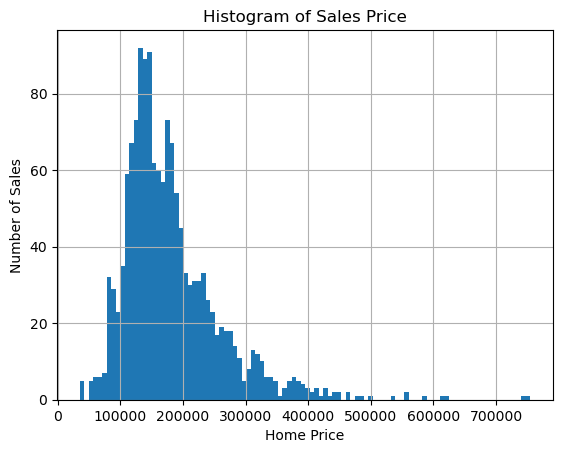

In [684]:
train.SalePrice.hist(bins=100)
plt.title("Histogram of Sales Price")
plt.xlabel('Home Price')
plt.ylabel('Number of Sales');

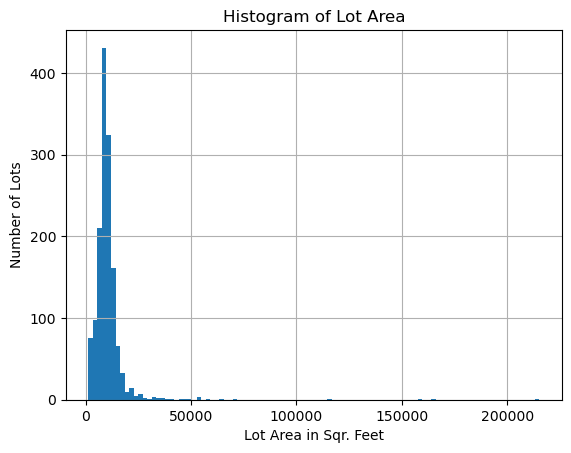

In [685]:
train.LotArea.hist(bins=100)
plt.title("Histogram of Lot Area")
plt.xlabel('Lot Area in Sqr. Feet')
plt.ylabel('Number of Lots');

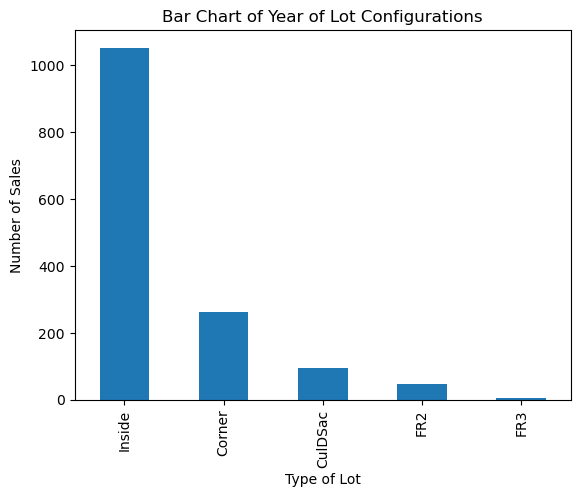

In [688]:
train['LotConfig'].value_counts().plot(kind='bar')
plt.title("Bar Chart of Year of Lot Configurations")
plt.xlabel('Type of Lot')
plt.ylabel('Number of Sales');

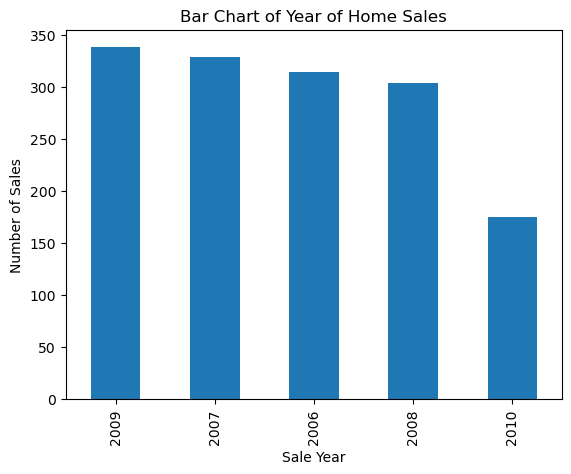

In [686]:
train['YrSold'].value_counts().plot(kind='bar')
plt.title("Bar Chart of Year of Home Sales")
plt.xlabel('Sale Year')
plt.ylabel('Number of Sales');

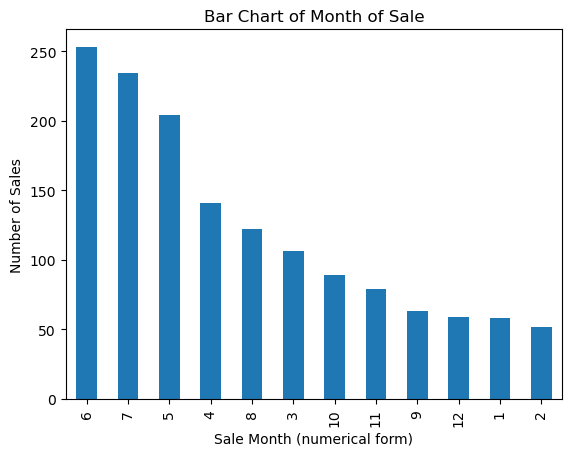

In [687]:
train['MoSold'].value_counts().plot(kind='bar')
plt.title("Bar Chart of Month of Sale")
plt.xlabel('Sale Month (numerical form)')
plt.ylabel('Number of Sales');

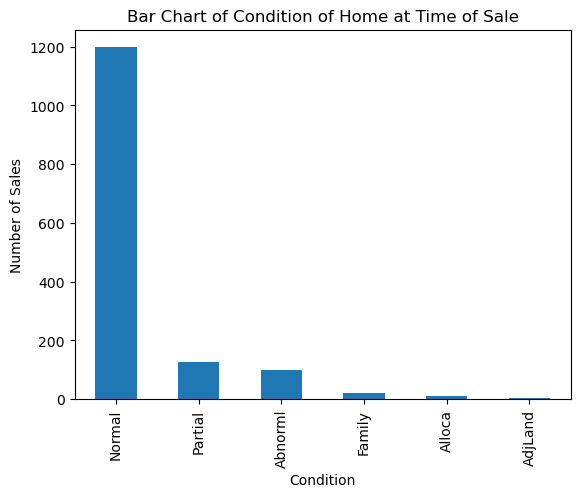

In [689]:
train['SaleCondition'].value_counts().plot(kind='bar')
plt.title("Bar Chart of Condition of Home at Time of Sale")
plt.xlabel('Condition')
plt.ylabel('Number of Sales');

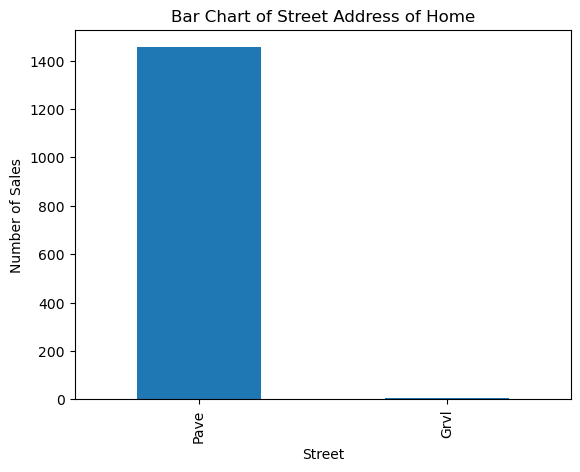

In [690]:
train['Street'].value_counts().plot(kind='bar')
plt.title("Bar Chart of Street Address of Home")
plt.xlabel('Street')
plt.ylabel('Number of Sales');

## 2. Checking for correlation of features

/var/folders/p6/m6jgqfqj44v0v8wkn8xmqfm40000gn/T/ipykernel_86890/2064821000.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(train.corr(), xticklabels=train.corr().columns, yticklabels=train.corr().columns,  cmap="YlGnBu", annot=False)


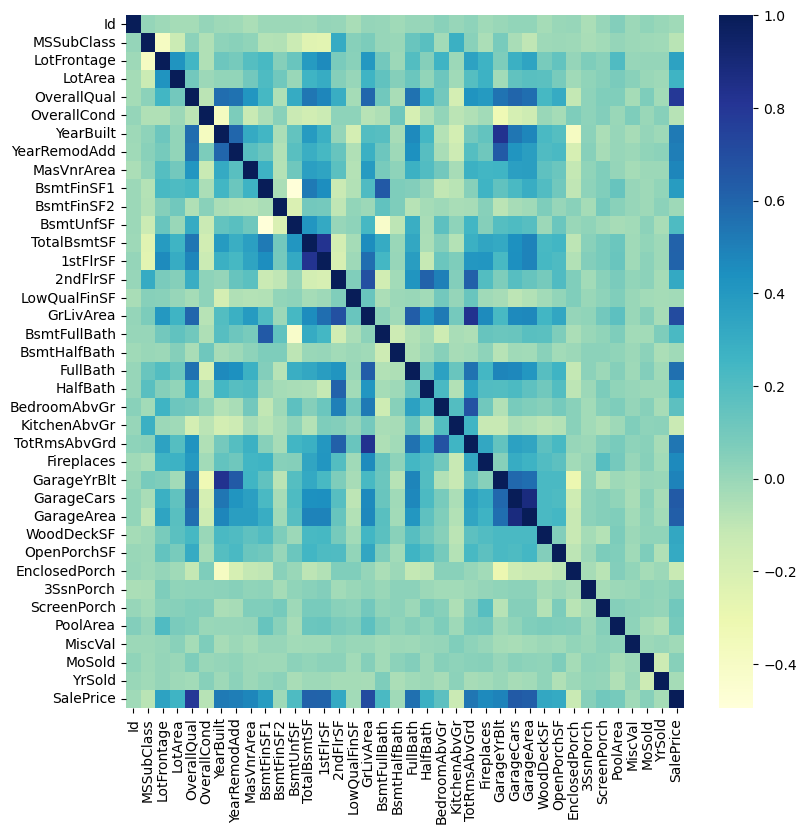

In [716]:
plt.figure(figsize=(9, 9))

dataplot = sb.heatmap(train.corr(), xticklabels=train.corr().columns, yticklabels=train.corr().columns,  cmap="YlGnBu", annot=False)
plt.savefig('corr.png', bbox_inches="tight")
plt.show();

**Conclusion**: There isn't a very strong correlation between any of our features and our label: SalePrice. This means we're going to need to engineer some features if we want to build a strong predictor

## 3. Engineer New Features 

To me, the most glaring piece of missing data in this set is total square footage, but I think it would also help to have a TotalBath and TotalBedroom feature. We'll design a class, `AddFeatures` to return a DataFrame with new (and hopefully more predictictive, features).

Substeps: 

   1. Build a function `add_total_sf` to get a total square footage number and append it to our df
   2. Build a function `add_finished_sf` to get a total finished square footage and add it to our df
   3. Build a function `add_high_quality_sf` to get a total finished square footage and add it to our df
   4. Build a function `add_finished_beds` to get a total finished square feet and add it to our df

In [369]:
class AddFeatures:
    
    def __init__(self, df):
        self.df = df
        self.final_df = self.run()
        
        
    def add_total_sf(self):
        """
        We're going to derive total square footage from 
        three places in our dataset: First floot square feet (1stFlrSF),
        second floor square feet (2ndFlrSF), and Total Basement square feet,
        (TotalBsmtSF). Then we'll add it to our dataframe.
        """
        temp = self.df
        total_SF = temp['1stFlrSF'] + temp['2ndFlrSF'] + temp['TotalBsmtSF']
        temp['totalSF'] = total_SF
        return temp
    
    def add_finished_sf(self):
        """
        Same as total square feet above but excludes unfinished basement
        space.
        """
        temp = self.df
        total_SF = temp['1stFlrSF'] + temp['2ndFlrSF'] + temp['TotalBsmtSF'] - temp['BsmtUnfSF']
        temp['finishedSF'] = total_SF
        return temp
    
    def add_high_quality_sf(self):
        """
        Same as total square feet above but excludes low-quality
        space.
        """
        temp = self.df
        total_SF = temp['1stFlrSF'] + temp['2ndFlrSF'] + temp['TotalBsmtSF'] - temp['LowQualFinSF']
        temp['qualitySF'] = total_SF
        return temp
    
    def add_total_bath(self):
        """
        Add FullBath, HalfBath.
        """
        temp = self.df
        total_bath = temp['FullBath'] + temp['HalfBath']
        temp['total_bath'] = total_bath
        return temp
    
    def run(self):
        final_df = pd.concat([self.add_total_sf(), self.add_finished_sf(), self.add_total_bath(), self.add_high_quality_sf()]).drop_duplicates().reset_index(drop=True)
        return final_df

In [370]:
nt = AddFeatures(train).final_df

### Visualizing The New Features

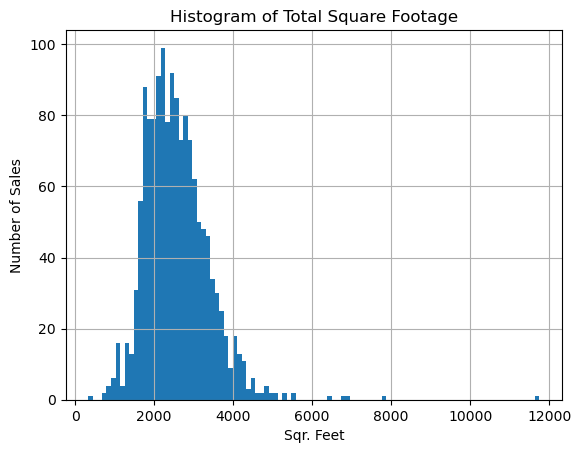

In [691]:
nt.totalSF.hist(bins=100)
plt.title("Histogram of Total Square Footage")
plt.xlabel('Sqr. Feet')
plt.ylabel('Number of Sales');

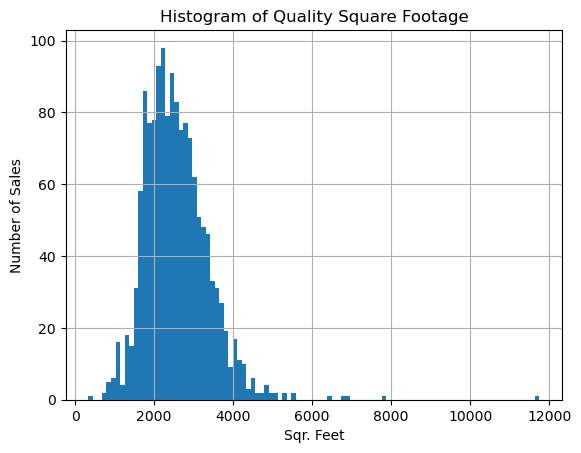

In [692]:
nt.qualitySF.hist(bins=100)
plt.title("Histogram of Quality Square Footage")
plt.xlabel('Sqr. Feet')
plt.ylabel('Number of Sales');

In [399]:
pt = nt[['LotFrontage',  'LotArea', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice', 'totalSF', 'finishedSF', 'total_bath', 'qualitySF']]

/var/folders/p6/m6jgqfqj44v0v8wkn8xmqfm40000gn/T/ipykernel_86890/2884930788.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot2 = sb.heatmap(nt.corr(), xticklabels=nt.corr().columns, yticklabels=nt.corr().columns, cmap="YlGnBu", annot=False)


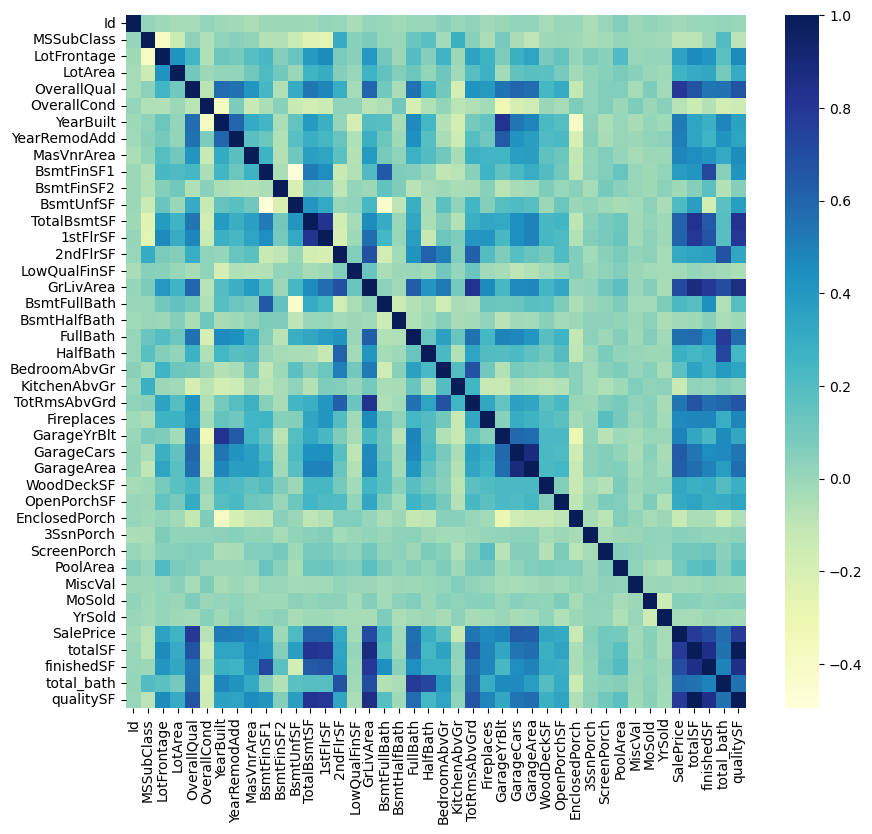

In [645]:
plt.figure(figsize=(10, 9))

dataplot2 = sb.heatmap(nt.corr(), xticklabels=nt.corr().columns, yticklabels=nt.corr().columns, cmap="YlGnBu", annot=False)

plt.show()

/var/folders/p6/m6jgqfqj44v0v8wkn8xmqfm40000gn/T/ipykernel_86890/95022700.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot3 = sb.heatmap(pt.corr(), cmap="YlGnBu", annot=False)


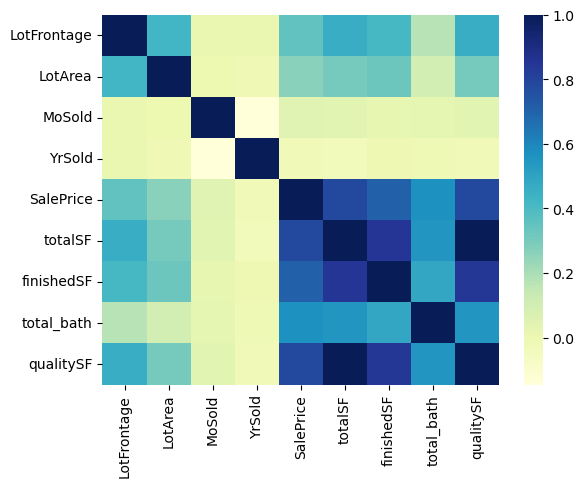

In [711]:
dataplot3 = sb.heatmap(pt.corr(), cmap="YlGnBu", annot=False)
plt.savefig('baby_corr.png', bbox_inches="tight")
plt.show()

**Conclusion**: The new features in general, and `totalSF` and `finishedSF` in particular, look like really strong correlates to `SalesPrice`.

## 4. Cleaning and Encode our data

Substeps:

   1. Drop features that have insuffiencent coverage by wrting `drop_low_coverage` function.
   2. Design a class `Preprocess` which takes two variable `X` (features) and `y` ('SalePrice') and (1) adds the new   features, (2) drops categorical NaN values, (3) fills numeric NaN values, and (4) encodes the result.
   3. Finally, ensure that, once processed, our train and test datasets have the same columns.

In [339]:
def drop_low_coverage(df, coverage_series, threshold=0.5):
    """
    A helper function that finds features with 
    low coverage (high percentage of nan values)
    as defined by threshold, and drops them. 
    """
    cols = []
    count = 0
    for feature in coverage_series:
        if feature > threshold:
            cols.append(df.columns[count])
        count+=1
    df.drop(cols, axis=1, inplace=True)

In [626]:
cov = (train.isna().sum()) / len(train)
drop_low_coverage(train, cov)

In [627]:
temp = pd.read_csv('~/Desktop/kaggle_housing/data/house-prices-advanced-regression-techniques/train.csv')

In [628]:
set(temp.columns) - set(train.columns)

{'Alley', 'Fence', 'MiscFeature', 'PoolQC'}

In [698]:
numeric_features = temp.drop(['Id'], axis=1)._get_numeric_data().columns
cat = set(temp.columns) - set(numeric_features)
len(cat) / (len(numeric_features) + len(cat)) 

0.5432098765432098

In [612]:
# Lets put this in a class for easier reuse on test
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

class Preprocess:
    
    def __init__(self, X, y=None):
        self.X = X
        self.y = y
        self.processed_df = self.run()
        
    def drop_columns(self):
        """
        Drop the columns that have low coverage in the training set.
        """
        dropped = ['Alley', 'Fence', 'MiscFeature', 'PoolQC']
        return self.X.drop(dropped, axis=1)
    
    def add_new_features(self, df):
        """
        Add our new engineered features to the df.
        """
        return AddFeatures(df).final_df
    
    def encode(self, df):
        """
        Encodes categorical and numerical features, fills numerical NaN values,
        drops categorcial NaN values.
        """
        numeric_features = df.drop(['Id'], axis=1)._get_numeric_data().columns
        cat_features = list(set(df.columns) - set(numeric_features))
        cat_features.remove('Id')
        numeric_transformer = Pipeline(
            steps=[("imputer", SimpleImputer(strategy="mean")), ("scaler", StandardScaler())])
        categorical_transformer = Pipeline(
            steps=[
                ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
            ])
        df = df.dropna(subset=cat_features)
        preprocessor = ColumnTransformer(
            transformers=[
                ("numerical", numeric_transformer, numeric_features),
                ("categorical", categorical_transformer, cat_features),
            ])
        preprocessor.set_output(transform='pandas')
        temp = preprocessor.fit_transform(df)
        temp['Id'] = self.X['Id']
        if self.y is not None:
            temp['SalePrice'] = self.y
        return temp
    
    def run(self):
        """
        Drive code for the class.
        """
        df = self.drop_columns()
        df = self.add_new_features(df)
        return self.encode(df)

In [613]:
# Test it
proc = Preprocess(train.drop('SalePrice', axis=1), train['SalePrice'])

In [609]:
train.drop('SalePrice', axis=1)['Id']

0          1
1          2
2          3
3          4
4          5
        ... 
1455    1456
1456    1457
1457    1458
1458    1459
1459    1460
Name: Id, Length: 1460, dtype: int64

In [593]:
proc.processed_df

,numerical__MSSubClass,numerical__LotFrontage,numerical__LotArea,numerical__OverallQual,numerical__OverallCond,numerical__YearBuilt,numerical__YearRemodAdd,numerical__MasVnrArea,numerical__BsmtFinSF1,numerical__BsmtFinSF2,...,categorical__Heating_Grav,categorical__Heating_OthW,categorical__RoofMatl_ClyTile,categorical__RoofMatl_CompShg,categorical__RoofMatl_Membran,categorical__RoofMatl_Metal,categorical__RoofMatl_Tar&Grv,categorical__RoofMatl_WdShake,categorical__RoofMatl_WdShngl,SalePrice
1,-0.971629,0.168234,-0.201842,-0.562109,2.454247,-0.070841,-0.649082,-0.688417,0.858355,-0.287966,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,181500
2,0.113487,-0.331326,-0.076956,0.227168,-0.523537,0.823043,0.717473,0.054404,-0.086016,-0.287966,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,223500
3,0.384766,-0.664366,-0.205627,0.227168,-0.523537,-2.251917,-0.964441,-0.688417,-0.604268,-0.287966,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,140000
4,0.113487,0.334753,0.150866,1.016444,-0.523537,0.787288,0.612354,0.916443,0.238372,-0.287966,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,250000
6,-0.971629,-0.039916,-0.165209,1.016444,-0.523537,0.930309,0.875153,0.164451,1.608861,-0.287966,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,307000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,0.113487,0.168234,-0.171567,1.016444,-0.523537,0.608511,0.402114,1.319950,1.052220,-0.287966,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,240000
1451,-0.971629,0.084974,-0.227425,1.016444,-0.523537,1.073330,1.085392,0.201134,-1.018869,-0.287966,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,287090
1455,0.113487,-0.581106,-0.329226,-0.562109,-0.523537,0.751532,0.612354,-0.688417,-1.018869,-0.287966,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,175000
1456,-0.971629,0.376383,0.068744,-0.562109,0.469058,0.000670,-0.018364,-0.142765,0.497498,0.633824,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,210000


In [614]:
proc2 = Preprocess(X=test, y=None)

In [570]:
not_in_test = list(set(proc.processed_df.columns) - set(proc2.processed_df.columns))
not_in_test

['categorical__Utilities_NoSeWa',
 'categorical__GarageCond_Ex',
 'categorical__RoofMatl_Membran',
 'categorical__Exterior1st_Stone',
 'categorical__Functional_Sev',
 'categorical__Foundation_Stone',
 'categorical__Exterior2nd_AsphShn',
 'categorical__Exterior1st_ImStucc',
 'categorical__Condition2_Artery',
 'categorical__MSZoning_C (all)',
 'categorical__RoofMatl_Metal',
 'categorical__Exterior2nd_Stone',
 'categorical__Exterior2nd_Other',
 'categorical__GarageQual_Ex',
 'categorical__Heating_Grav',
 'categorical__HouseStyle_2.5Fin',
 'categorical__GarageCond_Po',
 'categorical__SaleType_ConLw',
 'categorical__Heating_OthW',
 'categorical__RoofMatl_ClyTile',
 'categorical__HouseStyle_1.5Unf',
 'categorical__GarageType_CarPort',
 'categorical__Condition2_RRAe']

In [561]:
not_in_train = set(proc2.processed_df.columns) - set(proc.processed_df.columns)
not_in_train

{'categorical__BsmtCond_Po',
 'categorical__Condition1_RRNe',
 'categorical__Condition2_Feedr',
 'categorical__Exterior1st_BrkComm',
 'categorical__MSZoning_RH'}

In [596]:
clean_train = proc.processed_df.drop(not_in_test, axis=1)

In [618]:
clean_test = proc2.processed_df.drop(not_in_train, axis=1)

In [598]:
proc2.processed_df.head()

,numerical__MSSubClass,numerical__LotFrontage,numerical__LotArea,numerical__OverallQual,numerical__OverallCond,numerical__YearBuilt,numerical__YearRemodAdd,numerical__MasVnrArea,numerical__BsmtFinSF1,numerical__BsmtFinSF2,...,categorical__Neighborhood_Somerst,categorical__Neighborhood_StoneBr,categorical__Neighborhood_Timber,categorical__Neighborhood_Veenker,categorical__Heating_GasA,categorical__Heating_GasW,categorical__RoofMatl_CompShg,categorical__RoofMatl_Tar&Grv,categorical__RoofMatl_WdShake,categorical__RoofMatl_WdShngl
2,0.101815,0.020261,0.589296,-1.264748,-0.521521,0.631802,0.494861,-0.736977,0.405865,-0.304281,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.101815,0.211638,-0.153941,-0.532581,0.563554,0.668692,0.494861,-0.642660,0.036618,-0.304281,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5,0.101815,0.068106,-0.149696,-0.532581,-0.521521,0.484238,0.287110,-0.736977,-1.139501,-0.304281,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7,0.101815,-0.506024,-0.458027,-0.532581,-0.521521,0.668692,0.494861,-0.736977,-1.139501,-0.304281,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
8,-0.981620,0.546547,-0.115737,0.199586,-0.521521,0.373566,0.079360,-0.736977,0.104997,-0.304281,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [539]:
clean_test.head()

,numerical__MSSubClass,numerical__LotFrontage,numerical__LotArea,numerical__OverallQual,numerical__OverallCond,numerical__YearBuilt,numerical__YearRemodAdd,numerical__MasVnrArea,numerical__BsmtFinSF1,numerical__BsmtFinSF2,...,categorical__Neighborhood_StoneBr,categorical__Neighborhood_Timber,categorical__Neighborhood_Veenker,categorical__Heating_GasA,categorical__Heating_GasW,categorical__RoofMatl_CompShg,categorical__RoofMatl_Tar&Grv,categorical__RoofMatl_WdShake,categorical__RoofMatl_WdShngl,SalePrice
2,0.101815,0.020261,0.589296,-1.264748,-0.521521,0.631802,0.494861,-0.736977,0.405865,-0.304281,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,None
3,0.101815,0.211638,-0.153941,-0.532581,0.563554,0.668692,0.494861,-0.642660,0.036618,-0.304281,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,None
5,0.101815,0.068106,-0.149696,-0.532581,-0.521521,0.484238,0.287110,-0.736977,-1.139501,-0.304281,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,None
7,0.101815,-0.506024,-0.458027,-0.532581,-0.521521,0.668692,0.494861,-0.736977,-1.139501,-0.304281,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,None
8,-0.981620,0.546547,-0.115737,0.199586,-0.521521,0.373566,0.079360,-0.736977,0.104997,-0.304281,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,None


## 5. Train an Ensemble Random Forest 

In [646]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = clean_train.drop('SalePrice', axis=1)
y = clean_train['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

reg = RandomForestRegressor()
reg.fit(X_train, y_train)

rf_preds = reg.predict(X_val)

## 6. Train an Ensemble Gradient Boost Model

In [652]:
from sklearn.ensemble import GradientBoostingRegressor

np.random.seed(42)

gbr = GradientBoostingRegressor(loss='squared_error')
gbr.fit(X_train, y_train)

gbr_preds = gbr.predict(X_val)

## 7. Evaluate our Predictions

We will use the Kaggle given eval metric: Root Mean Squared Error (RMSE)

In [653]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def evaluate(y_true, y_preds):
    return sqrt(mean_squared_error(y_true, y_preds))

In [654]:
rf_eval = evaluate(y_val, rf_preds)

In [655]:
gbr_eval = evaluate(y_val, gbr_preds)

In [656]:
print(f"Random Forest Evaluation: {rf_eval}")
print(f"Gradient Boosted Evaluation: {gbr_eval}")

Random Forest Evaluation: 37841.03845557965
Gradient Boosted Evaluation: 30176.787970679532


**Point 7 Conclusion:** The Gradient Boosted model seems slightly superior but not so superior that we will omit the random forest from the hypertuning

## 8. Hypertuning

### Gradient Boost

In [657]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [50, 100, 200, 400],
              'learning_rate': [0.1, 0.5, 0.75, 1],
              'subsample': [0.75, 1]
             }

gbr_model = GradientBoostingRegressor(loss='squared_error')

reg_cv = GridSearchCV(gbr_model, parameters)
reg_cv.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.5, 0.75, 1],
                         'n_estimators': [50, 100, 200, 400],
                         'subsample': [0.75, 1]})

In [658]:
reg_cv.best_params_

{'learning_rate': 0.1, 'n_estimators': 200, 'subsample': 1}

In [659]:
reg_cv_preds = reg_cv.predict(X_val)

In [660]:
reg_cv_preds = evaluate(y_val, reg_cv_preds)

In [661]:
print(f"Gradient Boosted CV Evaluation: {reg_cv_preds}")

Gradient Boosted CV Evaluation: 29932.583045152634


### Random Forest

In [662]:
rf_parameters = {'n_estimators': [100, 200, 400],
                 'min_samples_leaf': [1, 2, 4]
                }

rf_model = RandomForestRegressor()

rf_cv = GridSearchCV(rf_model, rf_parameters)
rf_cv.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [100, 200, 400]})

In [663]:
rf_cv.best_params_

{'min_samples_leaf': 2, 'n_estimators': 100}

In [664]:
rf_cv_preds = rf_cv.predict(X_val)

In [665]:
rf_cv_evals = evaluate(y_val, rf_cv_preds)

In [666]:
print(f"Random Forest CV Evaluation: {rf_cv_evals}")

Random Forest CV Evaluation: 39398.1394516773


### Gradient Boost Round Two

It looks like both models like having a greater number of estimators, so lets lean into that. Furthermore, it doesn't look like hypertuning is going to lead to our RandomForest overtaking our Gradient Boosted model, so let's discard it.

In [667]:
from sklearn.model_selection import GridSearchCV

parameters2 = {'n_estimators': [400, 600, 800],
              'subsample': [0.75, 1]
             }

gbr_model2 = GradientBoostingRegressor(loss='squared_error')

reg_cv2 = GridSearchCV(gbr_model, parameters)
reg_cv2.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.5, 0.75, 1],
                         'n_estimators': [50, 100, 200, 400],
                         'subsample': [0.75, 1]})

In [668]:
reg_cv2.best_params_

{'learning_rate': 0.1, 'n_estimators': 100, 'subsample': 0.75}

In [669]:
reg_cv2_preds = reg_cv2.predict(X_val)

In [670]:
reg_cv2_evals = evaluate(y_val, reg_cv2_preds)

In [671]:
print(f"Gradient Boost2 CV Evaluation: {reg_cv2_evals}")

Gradient Boost2 CV Evaluation: 30194.6370916523


Conclusion of Hypertuning: It looks like this set of parameters is the best its going to get. Let's build a model with them and use it to predict our test set.

## 9. Predicting on Test

In [672]:
model = GradientBoostingRegressor(loss='squared_error', n_estimators=400, subsample=0.75)
model.fit(X, y)

GradientBoostingRegressor(n_estimators=400, subsample=0.75)

In [673]:
proc

In [675]:
preds = model.predict(clean_test.drop('Id', axis=1))

In [676]:
preds

array([195395.94456312, 188402.97606178, 171339.55975648, 161315.08120148,
       180351.99790786, 190984.13155613, 149145.5120988 , 414429.27515781,
       291142.09442734, 241173.55288252, 483621.71412825, 330652.80651083,
       197639.71078677, 181660.73422714, 183341.78067238, 351742.45767949,
       216974.10997855, 193350.45418794, 298076.80996634, 280610.80614346,
       243621.86009182, 314206.94981618, 234737.58447061, 219451.58946099,
       267146.46896775, 205850.49425597, 216018.54197322, 163437.45202108,
       163070.17067289, 164923.03288398, 181928.96160573, 101585.5636514 ,
       167384.75332417,  66776.29257715, 208297.86372071, 122350.10880247,
       135675.13980212, 139087.09227762, 104818.48529067, 137135.88546325,
       176487.51536253, 136806.86902124, 146805.53739526, 158654.38392702,
       240944.10638842, 237444.71343118, 159343.90315355, 144342.30959976,
       117315.30034987, 278775.01469602, 232752.10086053, 238616.32506791,
       186160.09927776, 3

In [677]:
clean_test.Id

2       1463
3       1464
5       1466
7       1468
8       1469
        ... 
1443    2904
1446    2907
1451    2912
1456    2917
1458    2919
Name: Id, Length: 697, dtype: int64

In [678]:
formatted_preds = pd.Series(preds, index=clean_test['Id'].values)

In [679]:
formatted_preds

1463    195395.944563
1464    188402.976062
1466    171339.559756
1468    161315.081201
1469    180351.997908
            ...      
2904    349539.240383
2907    108018.137709
2912    148723.556985
2917    189621.173915
2919    232924.956189
Length: 697, dtype: float64

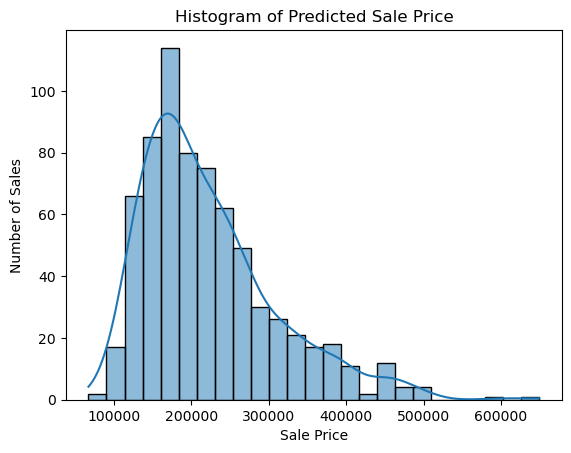

In [715]:
sb.histplot(data=formatted_preds, kde=True)
plt.title("Histogram of Predicted Sale Price")
plt.xlabel('Sale Price')
plt.ylabel('Number of Sales');
plt.savefig('pred_hist.png', bbox_inches="tight")